<a href="https://colab.research.google.com/github/ArvindDs/Projects/blob/main/logistic_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

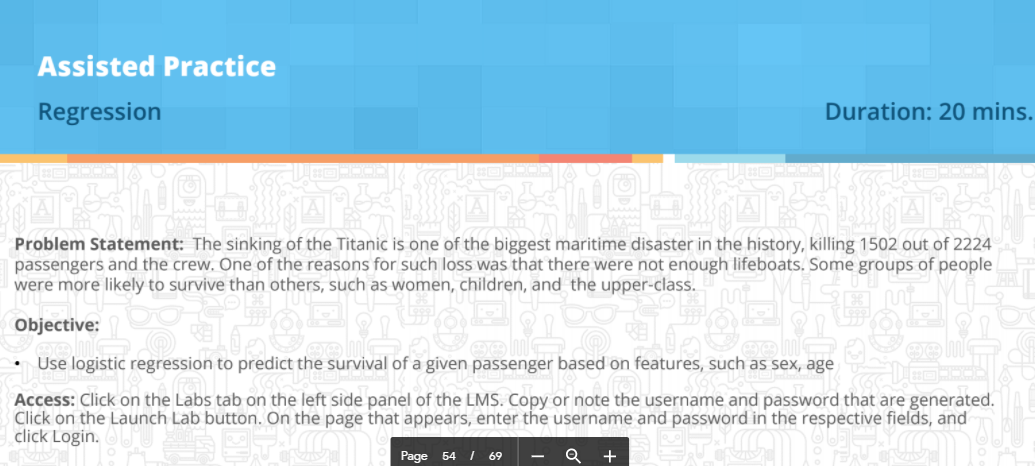

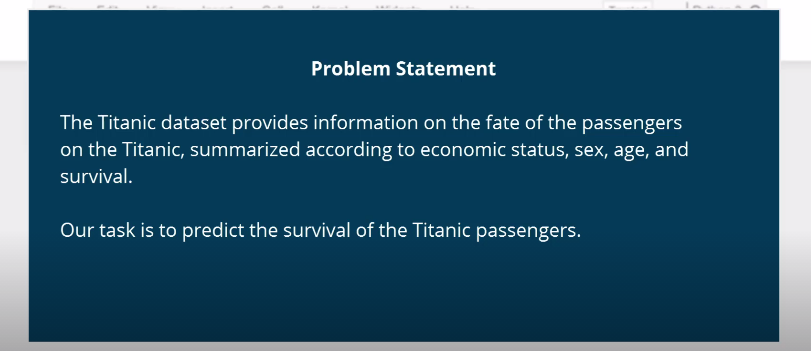

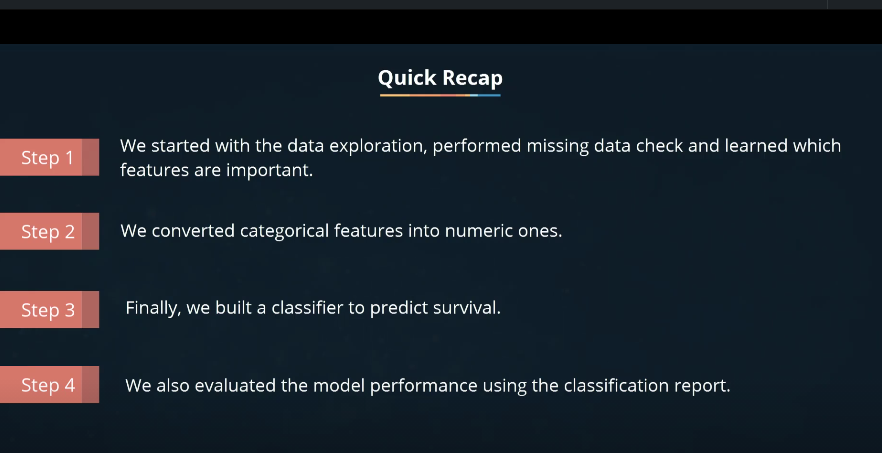

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:

Survived: Outcome of survival (0 = No; 1 = Yes)
Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
Name: Name of passenger
Sex: Sex of the passenger
Age: Age of the passenger (Some entries contain NaN)
SibSp: Number of siblings and spouses of the passenger aboard
Parch: Number of parents and children of the passenger aboard
Ticket: Ticket number of the passenger
Fare: Fare paid by the passenger
Cabin Cabin number of the passenger (Some entries contain NaN)
Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)





In [ ]:
import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Here we see that data of  age,cabin,  and Embarked data are  missing.
# We need to find a  way to approximate those missing values and drop variables which has no effect on survival.


In [ ]:
df_train.shape

(891, 12)

### Since we're interested in the outcome of survival for each passenger or crew member, we can remove the Survived feature from this dataset and store it as its own separate variable outcomes. We will use these outcomes as our prediction targets.(Ritchie Ng)

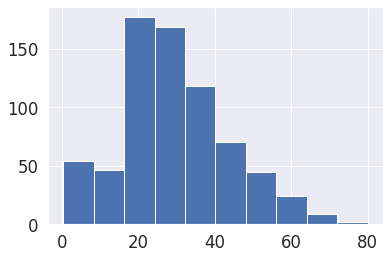

In [ ]:
plt.hist(df_train['Age'])
plt.show()
# Notice that age is  right skewed so if we will  take mean of the  age it will turn towards right. So it  is good to take median for missing data.
# see 5.18 minute in simpliLearn
# If we will take mean it will be near 20 to 40 as age range 20 to  40 passangers are in more in numbers.

In [ ]:
df_train=df_train.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1)

In [ ]:
df_train.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [ ]:
# Now finding mean age of each Passenger class . Then  
df_train.groupby('Pclass').mean()['Age']


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

## we see that mean age for each class is different. so if passenger sitting in class 1 his mean age is 38 and so on. 

In [ ]:
def age_approx(cols):
   Age=cols[0]
   Pclass=cols[1]

   if pd.isnull(Age):
       if Pclass==1:
         return 37
       elif Pclass==2:
         return 29
       else:
            
            return 25 
   else:
      return Age

           




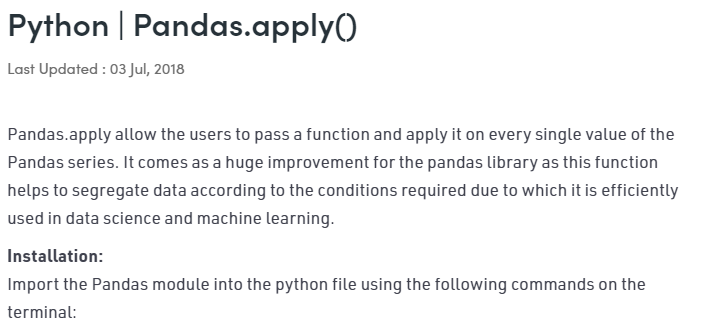

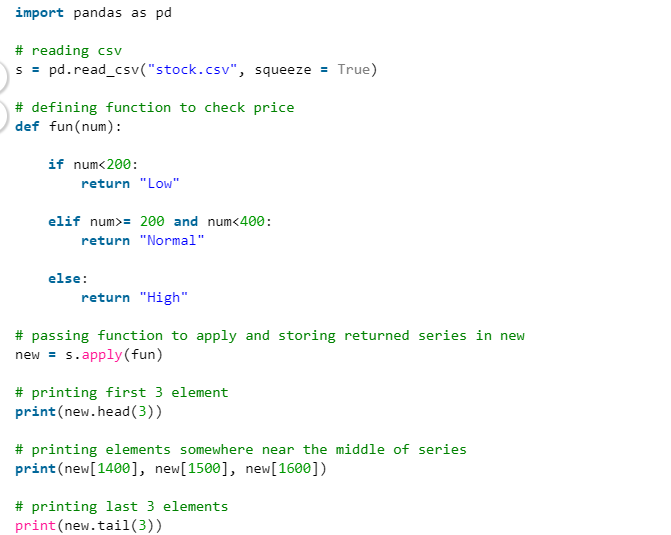

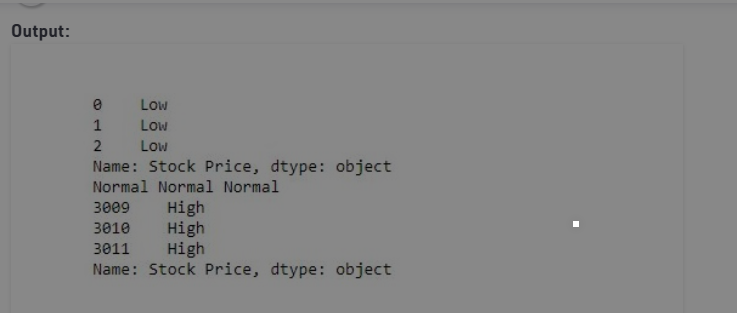

## Replacing null  values in the data frame.

In [ ]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [ ]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

## There are 2 null values dropping these null  values

In [ ]:
df_train.dropna(inplace=True)
df_train.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
type(df_train)

pandas.core.frame.DataFrame

In [ ]:
#  checking data types  of each column
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
df_train.shape

(889, 8)

## Sex  and Embarked is categorical data so converting into numerical data.

In [ ]:
df_dummy=pd.get_dummies(df_train,columns=['Sex','Embarked'])
df=df_dummy
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


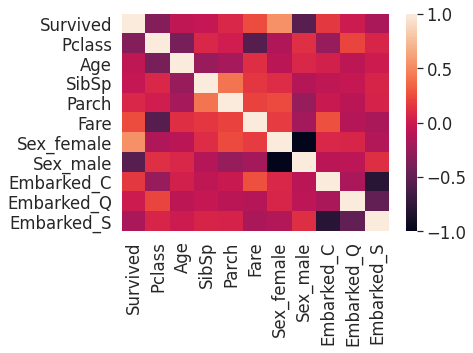

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr())

In [ ]:
feature_col=['Pclass','Age','SibSp','Parch','Sex_female',	'Sex_male',	'Embarked_C',	'Embarked_Q',	'Embarked_S']


In [ ]:
X=df[feature_col].values
Y=df['Survived']


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y, test_size=0.3,random_state=1)

In [ ]:
print(xtrain.shape)

(622, 9)


In [ ]:
print(xtest.shape)

(267, 9)


In [ ]:
print(ytest.shape)

(267,)


In [ ]:
print(ytrain.shape)

(622,)


In [ ]:
LogReg=LogisticRegression()


In [ ]:
LogReg.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=LogReg.predict(xtest)

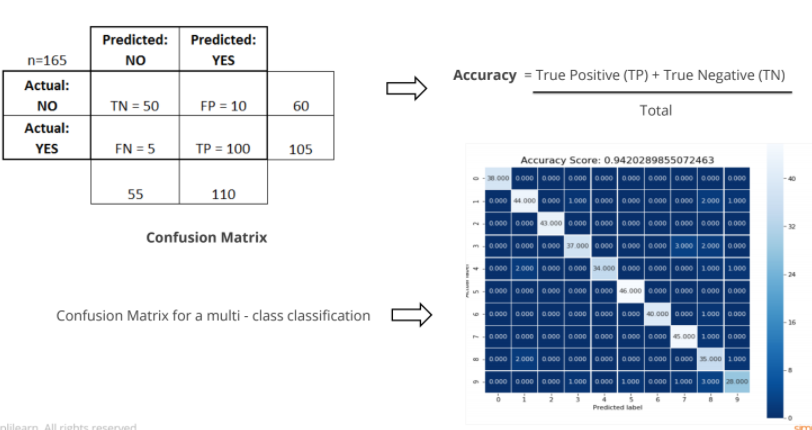

In [ ]:
metrics.confusion_matrix(ytest,y_pred)

array([[143,  23],
       [ 20,  81]])

It tells us that out of 166 incident of non servived the classifier predicted 143 instances and out of 101 instances of servived  the classifier ppredicted 81 as  servived. 
Now according to  the confusion metrics True Negative(TN) = 143 False Positive (FP)= 23, FN=20, TP=81
Therefore Acuuracy SCORE = TP+TN/TP+TN+FP+FN  = 224/267=0.83895131806
## iT MEANS OUT OF 100 83 WERE CORRECTLY CLASSIFED AS SERVIVED OR NOT SERVIVED.

In [ ]:
metrics.accuracy_score(ytest,y_pred)

0.8389513108614233

In [ ]:
len(xtest)

267

In [ ]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       166
           1       0.78      0.80      0.79       101

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [ ]:
LogReg.intercept_

array([2.88032198])

In [ ]:
LogReg.coef_

array([[-1.02850469, -0.04011948, -0.24299067, -0.04452371,  1.64964633,
        -0.72294234,  0.67172605,  0.25978369, -0.00480576]])

In [ ]:
df[feature_col].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
LogReg.predict_proba(xtest)

array([[0.26427778, 0.73572222],
       [0.39707792, 0.60292208],
       [0.94576539, 0.05423461],
       [0.25686516, 0.74313484],
       [0.94260086, 0.05739914],
       [0.13593333, 0.86406667],
       [0.32794421, 0.67205579],
       [0.51566384, 0.48433616],
       [0.77310963, 0.22689037],
       [0.40214345, 0.59785655],
       [0.7393095 , 0.2606905 ],
       [0.20595116, 0.79404884],
       [0.74419743, 0.25580257],
       [0.14465291, 0.85534709],
       [0.86003356, 0.13996644],
       [0.36423727, 0.63576273],
       [0.88912602, 0.11087398],
       [0.29663491, 0.70336509],
       [0.17787618, 0.82212382],
       [0.39310838, 0.60689162],
       [0.90174482, 0.09825518],
       [0.55036547, 0.44963453],
       [0.86205266, 0.13794734],
       [0.93573128, 0.06426872],
       [0.51122189, 0.48877811],
       [0.5111912 , 0.4888088 ],
       [0.03877912, 0.96122088],
       [0.86479358, 0.13520642],
       [0.89834029, 0.10165971],
       [0.33153494, 0.66846506],
       [0.